In [5]:
import sklearn
from sklearn import tree
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import  display

In [7]:
from IPython.display import  HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

In [74]:
titanic_data = pd.read_csv('D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\Titanic\\train.csv',  encoding='utf-8')

In [9]:
titanic_data.head( )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket' , 'Cabin'], axis = 1)
y = titanic_data.Survived
# axis = 1 значает, что удалятся столбцы, а не индексы датафрейма 
                      # Survived убрали, потому что будем ее предсказывать. ( Удаляем ненужные для предикшена столбцы)

In [11]:
X = pd.get_dummies (X) # конвертирует переменные (строчные) в числовые (0,1) автоматически

In [12]:
X = X.fillna({'Age' : X.Age.median( )}) # заменяет все пропущенные значения в возрасте на средний возраст пассажиров(медианный)

In [13]:
X.head( )

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.33, random_state=42) # 33% выборки из датафрейма пойдет на тестовую. 
# (42 - начальное значение рандомного генератора чисел)

In [16]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3)

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [18]:
clf.score(X_train, y_train)

0.8238255033557047

In [19]:
clf.score(X_test, y_test) # точность правильных ответов, на данных, которое дерево наше не видело и не обучалось.

0.8203389830508474

In [20]:
clf.score(X, y) # число правильных ответов (в 97 процентах случаев)

0.8226711560044894

In [21]:
max_depth_values = range (1, 100)

In [22]:
scores_data = pd.DataFrame( )

In [23]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame( {'max_depth': [max_depth], 'train_score': [train_score], 'test_score' : [test_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [24]:
scores_data.head( )

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


In [25]:
scores_data_long = pd.melt( scores_data, id_vars=['max_depth'],  value_vars=['train_score', 'test_score'],
                      var_name='set_type',   value_name='score' )

In [26]:
scores_data_long.head(10)

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
5,6,train_score,0.867450
6,7,train_score,0.882550
7,8,train_score,0.909396
8,9,train_score,0.917785
9,10,train_score,0.926174


<AxesSubplot:xlabel='max_depth', ylabel='score'>

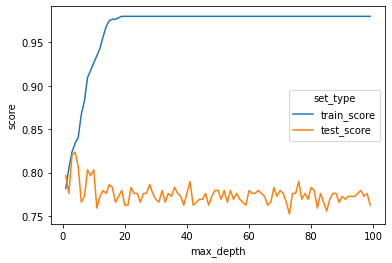

In [27]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type") # визуализируем, зависимость глубины обучения дерева от полученного значения 

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=4) # создадим снова классификатор с глубиной 4 и попробуем через кросс валидацию обуч. модель

In [30]:
cross_val_score(clf, X_train, y_train, cv = 5) # точность, полученная классификатором разделив трэйн выборки на 5 частей

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [31]:
cross_val_score(clf, X_train, y_train, cv = 5).mean( ) # средняя точность

0.7886274509803922

In [32]:
max_depth_values = range (1, 100)

In [33]:
scores_data = pd.DataFrame( )

In [34]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean( )
    
    temp_score_data = pd.DataFrame( {'max_depth': [max_depth], 
                                                              'train_score': [train_score], 
                                                               'test_score' : [test_score],
                                                                'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [35]:
scores_data.head( )

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.795350


In [36]:
scores_data_long = pd.melt( scores_data, id_vars=['max_depth'],  value_vars=['train_score',
                                                                             'test_score',
                                                                             'cross_val_score'],
                      var_name='set_type',   value_name='score' )

In [37]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.795350
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.800364
206,9,cross_val_score,0.793641
207,10,cross_val_score,0.798669


Найдем максимальное значение в таблице

In [38]:
scores_data_long.query("set_type == 'cross_val_score'").loc[scores_data_long.query("set_type == 'cross_val_score'")['score'].idxmax()]

max_depth                 13
set_type     cross_val_score
score               0.805392
Name: 210, dtype: object

<AxesSubplot:xlabel='max_depth', ylabel='score'>

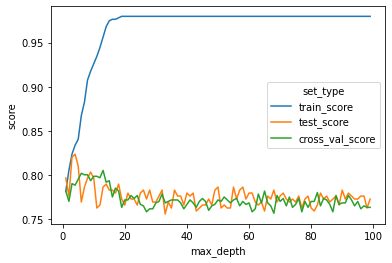

In [39]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")

In [40]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=10)

In [41]:
cross_val_score(clf, X_test, y_test, cv = 5).mean( )

0.7898305084745763

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
clf = tree.DecisionTreeClassifier( )
clf

DecisionTreeClassifier()

In [44]:
parametrs = {'criterion' : ['gini', 'entropy'], 'max_depth' : range (1, 30)}

In [45]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv = 5 )

In [46]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [47]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [48]:
best_clf = grid_search_cv_clf.best_estimator_

In [49]:
best_clf.score(X_test, y_test)

0.7864406779661017

In [50]:
from sklearn.metrics import precision_score, recall_score

In [51]:
y_pred = best_clf.predict(X_test)

In [52]:
precision_score(y_test, y_pred)

0.8

In [53]:
recall_score(y_test, y_pred)

0.6333333333333333

In [54]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [55]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [56]:
y_predicted_prob[:, 1] # Оставим только вторую колонку отнесения к положительному классу 

array([0.44444444, 0.25      , 0.06086957, 1.        , 1.        ,
       0.        , 0.75      , 0.06086957, 0.75      , 1.        ,
       1.        , 0.12      , 0.        , 0.13333333, 0.12      ,
       1.        , 0.        , 0.33333333, 0.06086957, 0.        ,
       0.06086957, 0.36842105, 0.33333333, 0.06086957, 0.06086957,
       0.        , 0.36842105, 0.25      , 0.        , 0.33333333,
       0.06086957, 1.        , 0.36842105, 1.        , 0.06086957,
       0.44444444, 0.36842105, 0.75      , 1.        , 0.06086957,
       0.        , 0.18181818, 0.06086957, 0.18181818, 0.        ,
       0.06086957, 0.06086957, 0.06086957, 0.18181818, 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.25      , 0.        , 1.        , 0.33333333,
       0.18181818, 1.        , 1.        , 0.        , 0.18181818,
       1.        , 0.        , 0.06086957, 0.13333333, 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.06086

<AxesSubplot:>

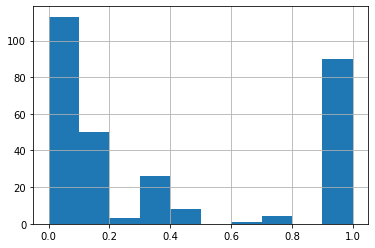

In [57]:
pd.Series(y_predicted_prob[:, 1]).hist( )

In [58]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.1, 1,0)

In [59]:
pd.Series(y_predicted_prob[:, 1]).unique( )

array([0.44444444, 0.25      , 0.06086957, 1.        , 0.        ,
       0.75      , 0.12      , 0.13333333, 0.33333333, 0.36842105,
       0.18181818, 0.66666667])

In [60]:
precision_score(y_test, y_pred)

0.5494505494505495

In [61]:
recall_score(y_test, y_pred)

0.8333333333333334

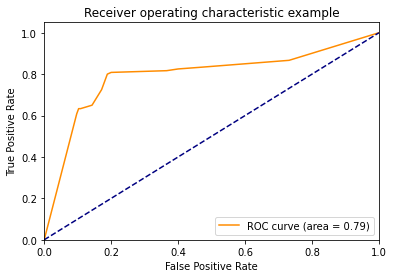

In [62]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

True Positive Rate - Recall (пассажиры, которых классифицировали, как выжившие и действительно, они выжившие)
False Positive Rate - то, для какого процента пассажиров с отрицательным классом , мы дали неправильный ответ (как часто пассажиров, которые
не выжили, мы интерпретировали, как выжившие)


In [63]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.9, 1,0)

In [64]:
precision_score(y_test, y_pred)

0.8111111111111111

In [65]:
recall_score(y_test, y_pred)

0.6083333333333333

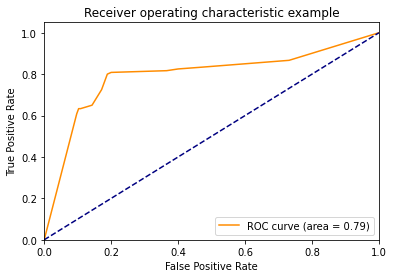

In [66]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show( )

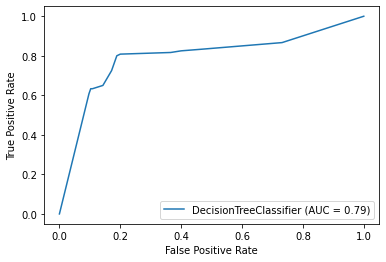

In [67]:
from sklearn import metrics

metrics.plot_roc_curve(best_clf, X_test, y_test)

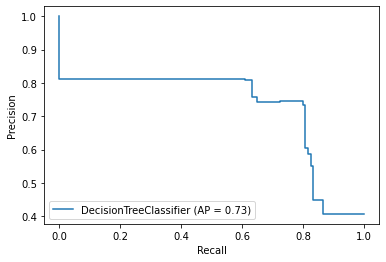

In [68]:
metrics.plot_precision_recall_curve(best_clf, X_test, y_test)

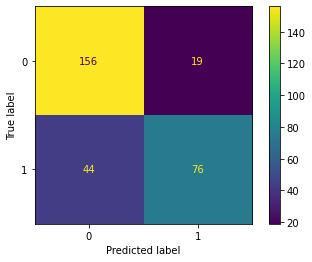

In [69]:
metrics.plot_confusion_matrix(best_clf, X_test, y_test)

In [86]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)
# min_samples_split пороговое значение наблюдений = 100 (Минимальное число образцов в узле, чтобы его можно было разделить на 2)
#min_samples_leaf не будет финального решения, в нашем дереве, в наборе данных, где их будет меньше 10 => 
#(Мин. число образцов в листьях при получившемся значении ниже разделение не будет произведено))

In [82]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

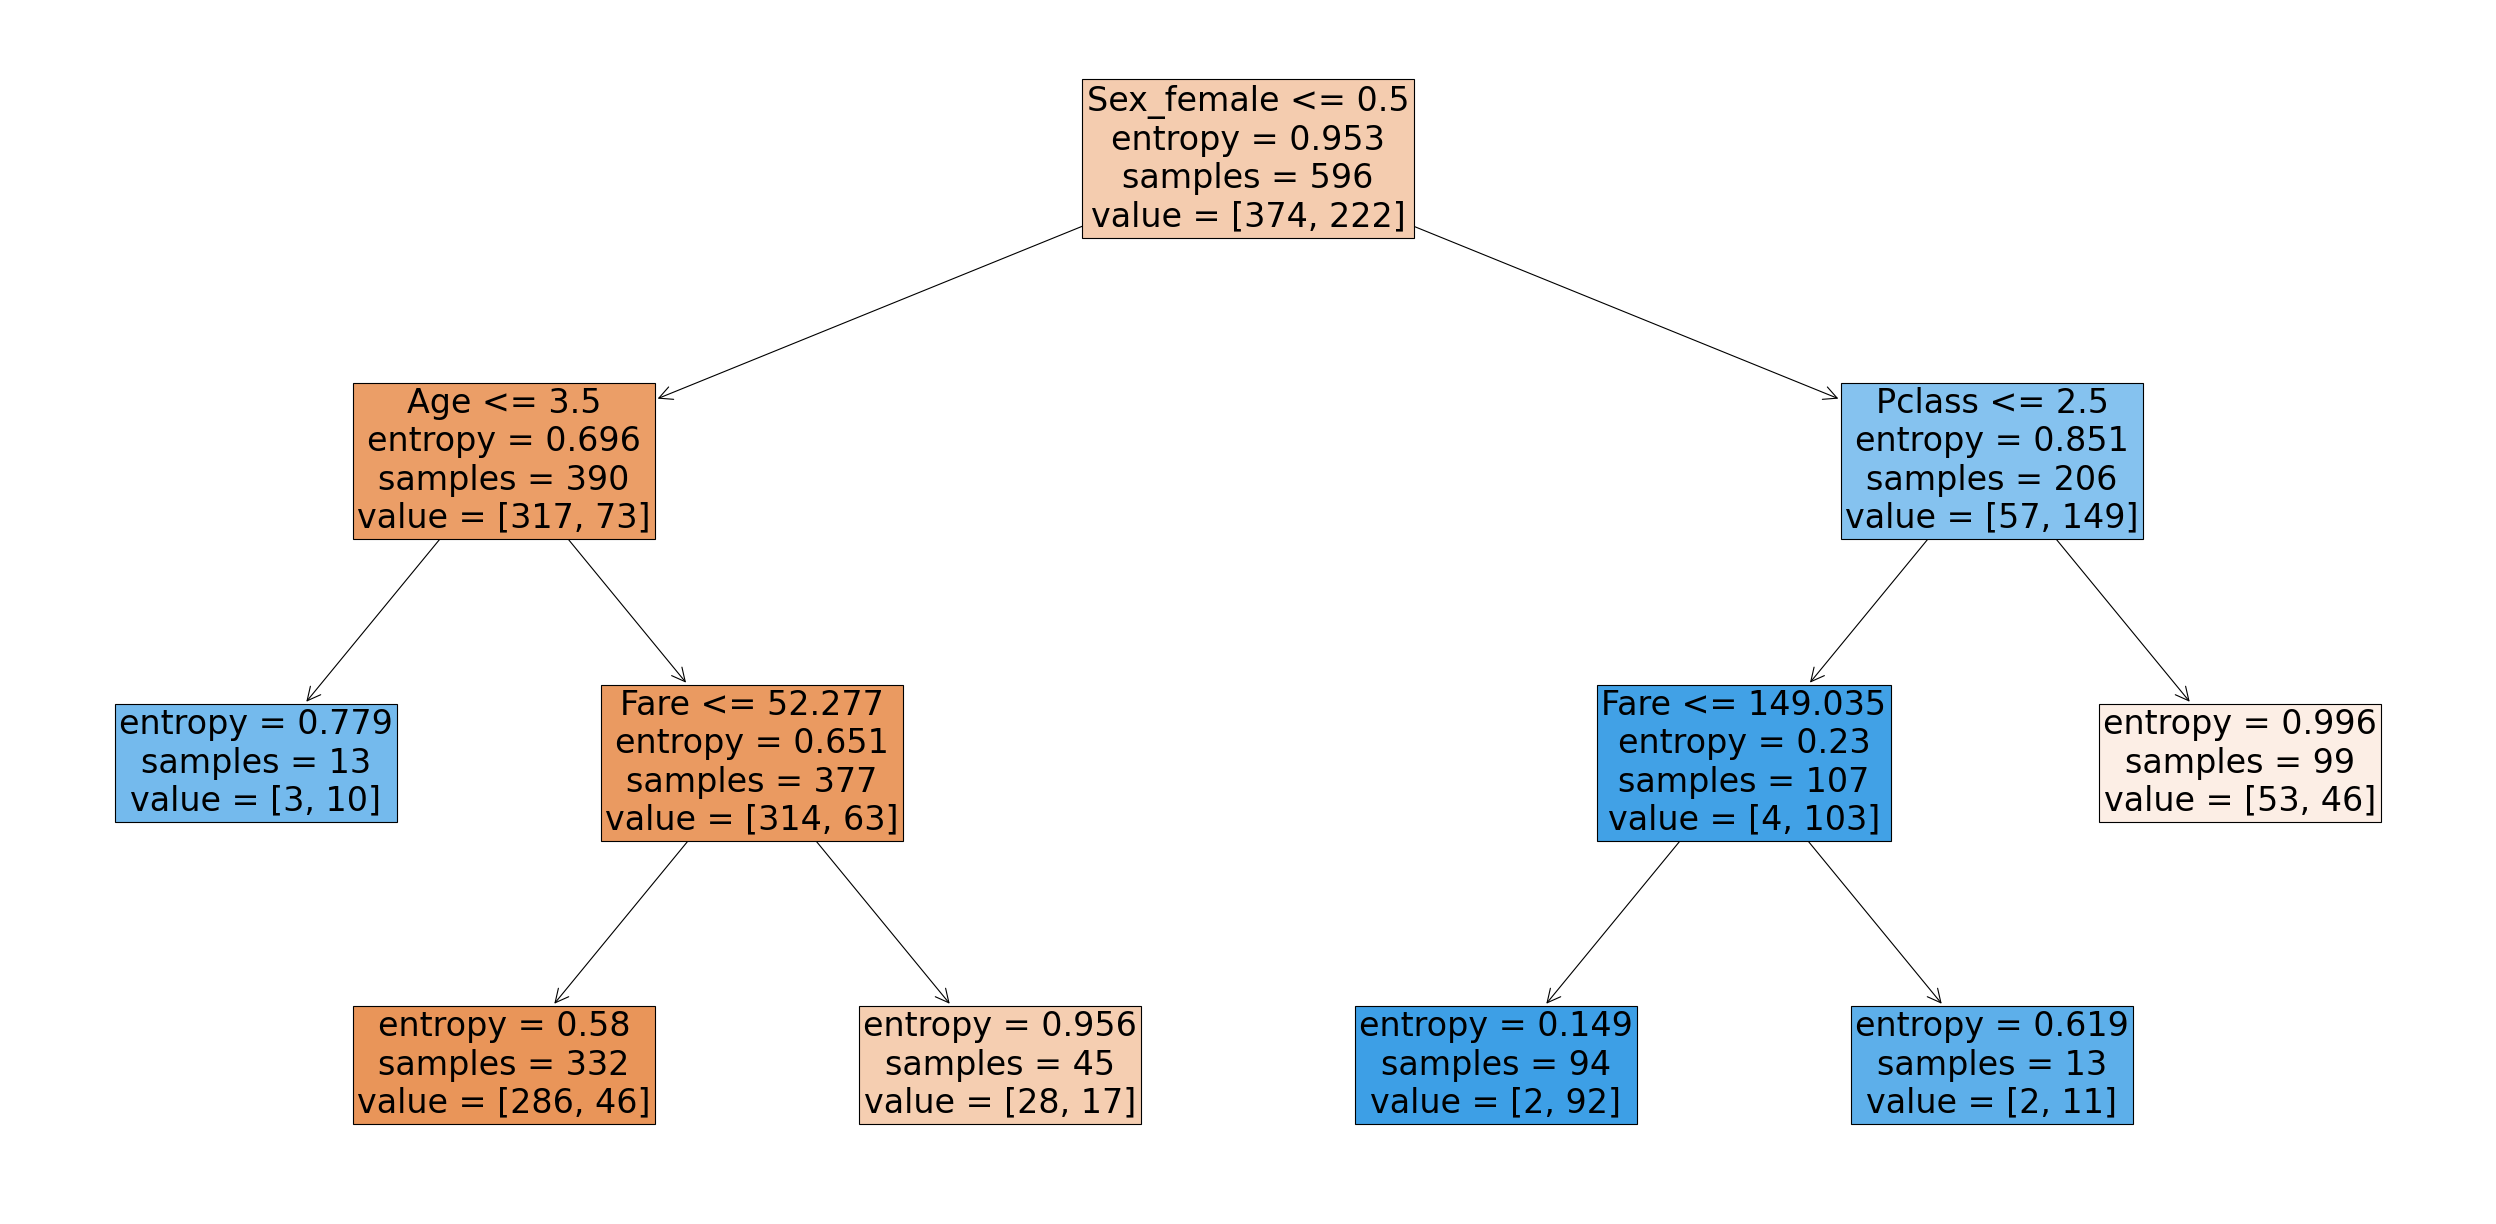

In [83]:
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=30,filled=True,feature_names=list(X))

Сырой словарь -  Значения, необходимые для разделения узла: 

1) min_impurity_decrease - ожидаемое минимальное уменьшение неопределенности (IG)

2) min_samples_split- минимальное количество сэмплов на входе узла

3) min_samples_leaf - минимальное количество сэмплов в выходном(ых) листе(ах)


- Чем больше значение min_samples_split, тем меньше тенденция к переобучению

- Малая глубина дерева препятствует переобучению


Балансировка между глубиной дерева, допустимым размером выборки, после которого можно сделать сплит и допуститым размером , кот. мы вообще можем отнести, себе после сплита  

Классификатор, который перебирает лучшие параметры, при которых получится оптимальное дерево решений

In [88]:
clf = tree.DecisionTreeClassifier()
clf
parametrs = {'criterion': ['gini','entropy'], 'max_depth': range(1,15), \
          'min_samples_split': range(2,400,20),'min_samples_leaf': range(2,50)}
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)
grid_search_cv_clf.fit(X, y)
grid_search_cv_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 42}

1) GridSearchCV находит наилучшее значение параметров модели из возникающих в результате комбинации переданных параметров;

2) Ни GridSearchCV, ни RandomizedSearchCV не гарантируют получение самой лучшей модели из возможных;

3) RandomizedSearchCV работает быстрее GridSearchCV так как перебирает не все из возможных комбинаций параметров.